In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#plt.style.use('mdi-style')
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
data = pd.read_excel('publication-stats.xlsx')

# Data generation

These data were generated from Web of Science with the following search terms:

- ML + Mat Sci: `Machine Learning Materials Science`
- Mat Sci: `Materials Science`
- ML: `Machine Learning`

In [3]:
data.head()

,Year,ML + Mat Sci,Mat Sci,ML
0,2023,4827,262655,83264
1,2022,4268,268723,83295
2,2021,3038,251571,70014
3,2020,1992,235922,53087
4,2019,1252,222686,44830


In [4]:
years = data.Year.values
ml_mat_sci = data['ML + Mat Sci'].values
mat_sci = data['Mat Sci'].values
ml = data['ML'].values

In [5]:
ml_percent_mat_sci = ml / mat_sci
norm_by_mat_sci = ml_mat_sci / mat_sci * 100
norm_by_ml = ml_mat_sci / ml * 100

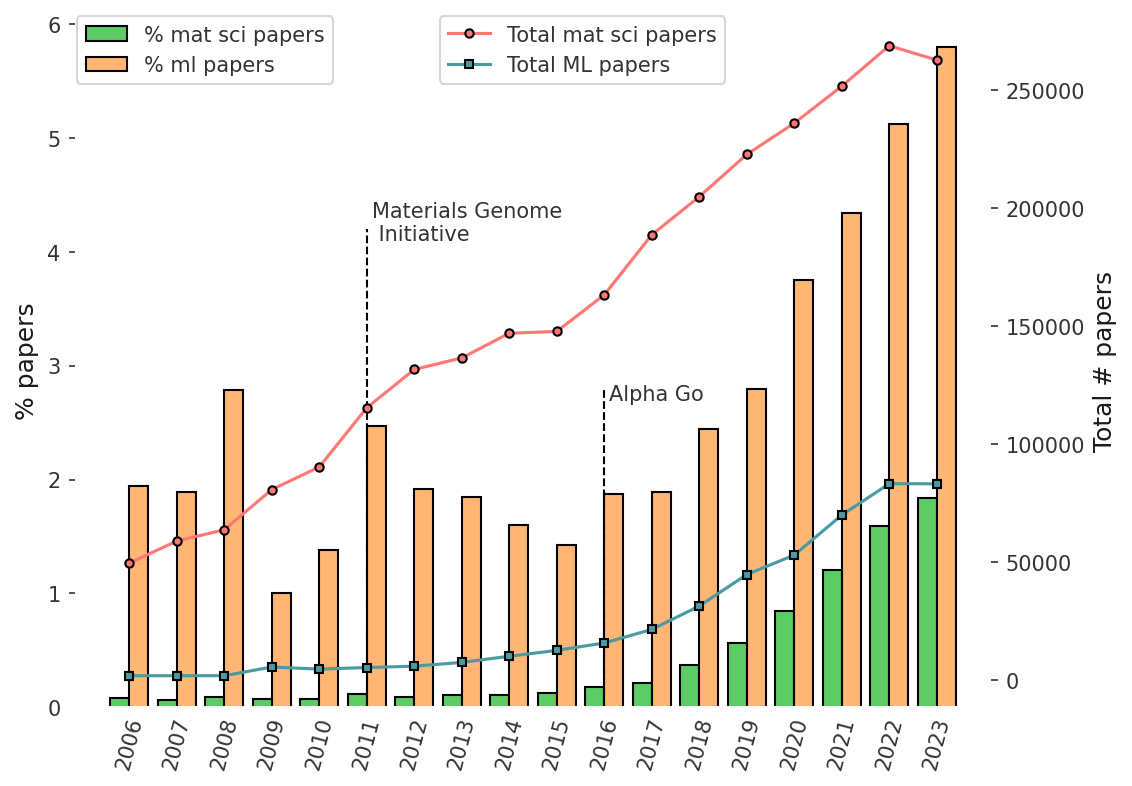

In [8]:
offset = 0.20
width = 0.4 
fig, ax = plt.subplots(figsize=(8, 6))
secy = ax.twinx()

bar_a = ax.bar(x = years - offset, height = norm_by_mat_sci, width=width, edgecolor='black', label = '% mat sci papers')
bar_b = ax.bar(x = years + offset, height = norm_by_ml, width=width, edgecolor='black', label = '% ml papers')
secy.plot(years, mat_sci, marker='o', markeredgecolor='black', c=cols[2], label = 'Total mat sci papers')
secy.plot(years, ml, marker='s', markeredgecolor='black', c=cols[3], label = 'Total ML papers')
ax.vlines(2011, 0, 4.2, color='black', ls='--', lw=1)
ax.text(2011.1, 4.1, 'Materials Genome \n Initiative')

ax.vlines(2016, 0, 2.8, color='black', ls='--', lw=1)
ax.text(2016.1, 2.7, 'Alpha Go')
ax.set_ylabel('% papers')
secy.set_ylabel('Total # papers')

ax.set_xticks(range(2006, 2024))
ax.set_xticklabels(range(2006, 2024), rotation = 75)
ax.legend(loc=(0.01, 0.9))
secy.legend(loc=(0.4, 0.9))

plt.savefig('editorial-stats.png')